In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.shape

(50000, 2)

Text(0.5, 1.0, 'Sentiment Distribution')

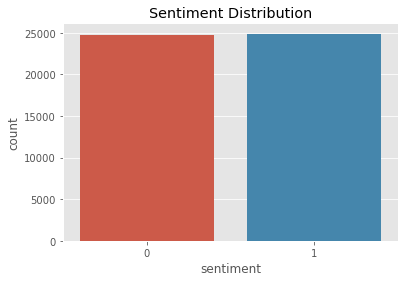

In [53]:
#optional
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment Distribution')

In [52]:
#optinal
for i in range(5):
    print("Review",[i])
    print(df['review'].iloc[i],"\n")
    print("Sentiment: ",df['sentiment'].iloc[i],"\n\n")

Review [0]
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well manner

In [10]:
def no_of_words(text):
    words=text.split()
    word_count=len(words)
    return word_count

In [11]:
df['Word Count']=df['review'].apply(no_of_words)

In [12]:
df.head()

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [13]:
df.sentiment.replace('positive',1,inplace=True)
df.sentiment.replace('negative',0,inplace=True)

In [14]:
df

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


In [15]:
def data_preprocessing(text):
    text=text.lower()
    text=re.sub('<br />','',text)
    text=re.sub(r'http\S+','',text,flags=re.MULTILINE)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return" ".join(filtered_text)

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df.review=df['review'].apply(data_preprocessing)

In [18]:
df['Word Count']=df['review'].apply(no_of_words)

In [19]:
df

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


In [20]:
duplicated_count=df.duplicated().sum()
print("Number of duplicated entries:",duplicated_count)

Number of duplicated entries: 422


In [21]:
df=df.drop_duplicates('review')

In [22]:
df

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


In [23]:
duplicated_count=df.duplicated().sum()
print("Number of duplicated entries:",duplicated_count)

Number of duplicated entries: 0


In [24]:
stemmer=PorterStemmer()
def stemming (data):
    text=[stemmer.stem(word) for word in data]
    return data

In [25]:
df.review=df['review'].apply(lambda x:stemming(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_4788\1263367072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review=df['review'].apply(lambda x:stemming(x))


In [26]:
df['Word Count']=df['review'].apply(no_of_words)
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_4788\1144763576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word Count']=df['review'].apply(no_of_words)


,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [27]:
X=df['review']
Y=df['sentiment']

In [28]:
vect=TfidfVectorizer()
X=vect.fit_transform(df['review'])

In [29]:
X

<49578x221795 sparse matrix of type '<class 'numpy.float64'>'
	with 4938852 stored elements in Compressed Sparse Row format>

In [30]:
#optainal
X[0]

<1x221795 sparse matrix of type '<class 'numpy.float64'>'
	with 142 stored elements in Compressed Sparse Row format>

In [31]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49578, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=42)

In [33]:
print("Size of x_train : ",(x_train.shape))
print("Size of y_train : ",(y_train.shape))
print("Size of x_test : ",(x_test.shape))
print("Size of y_test : ",(y_test.shape))

Size of x_train :  (34704, 221795)
Size of y_train :  (34704,)
Size of x_test :  (14874, 221795)
Size of y_test :  (14874,)


In [34]:
x_train=x_train[:10000, :10000]
y_train=y_train[:10000]
x_test=x_test[:2000, :10000]
y_test=y_test[:2000]

In [35]:
print("Size of x_train : ",(x_train.shape))
print("Size of y_train : ",(y_train.shape))
print("Size of x_test : ",(x_test.shape))
print("Size of y_test : ",(y_test.shape))

Size of x_train :  (10000, 10000)
Size of y_train :  (10000,)
Size of x_test :  (2000, 10000)
Size of y_test :  (2000,)


In [36]:
x_train_new=x_train
y_train_new=y_train
x_test_new=x_test
y_test_new=y_test

In [37]:
print("Size of x_train_new : ",(x_train_new.shape))
print("Size of y_train_new : ",(y_train_new.shape))
print("Size of x_test_new: ",(x_test_new.shape))
print("Size of y_test_new : ",(y_test_new.shape))

Size of x_train_new :  (10000, 10000)
Size of y_train_new :  (10000,)
Size of x_test_new:  (2000, 10000)
Size of y_test_new :  (2000,)


In [38]:
x_train_new

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 32334 stored elements in Compressed Sparse Row format>

In [39]:
y_train_new

42599    1
40725    0
14227    0
8251     0
15746    1
        ..
41830    1
24103    1
15726    0
16654    1
19906    0
Name: sentiment, Length: 10000, dtype: int64

In [40]:
x_train_new=x_train_new.toarray()
x_test_new=x_test_new.toarray()

In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
model=Sequential()
model.add(Dense(units=16,activation='relu',input_dim=x_train_new.shape[1]))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [43]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
x_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
y_train_new

42599    1
40725    0
14227    0
8251     0
15746    1
        ..
41830    1
24103    1
15726    0
16654    1
19906    0
Name: sentiment, Length: 10000, dtype: int64

In [46]:
history=model.fit(x_train_new,y_train_new,batch_size=10,epochs=15)

Epoch 1/15
1000/1000 [==============================] - 8s 4ms/step - loss: 0.6911 - accuracy: 0.5364
Epoch 2/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6762 - accuracy: 0.6059
Epoch 3/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6544 - accuracy: 0.6236
Epoch 4/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6365 - accuracy: 0.6321
Epoch 5/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6240 - accuracy: 0.6447
Epoch 6/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6157 - accuracy: 0.6550
Epoch 7/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6098 - accuracy: 0.6627
Epoch 8/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6051 - accuracy: 0.6611
Epoch 9/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6024 - accuracy: 0.6670
Epoch 10/15
1000/1000 [==============================] - 4s 4ms/step - loss: 0.599

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________


In [48]:
test_loss, test_acc = model.evaluate(x_test_new, y_test_new)

63/63 [==============================] - 2s 7ms/step - loss: 0.6544 - accuracy: 0.6000


In [49]:
print("test_loss: ", test_loss)

test_loss:  0.6544175744056702


In [50]:
print("test_acc: ", test_acc)

test_acc:  0.6000000238418579


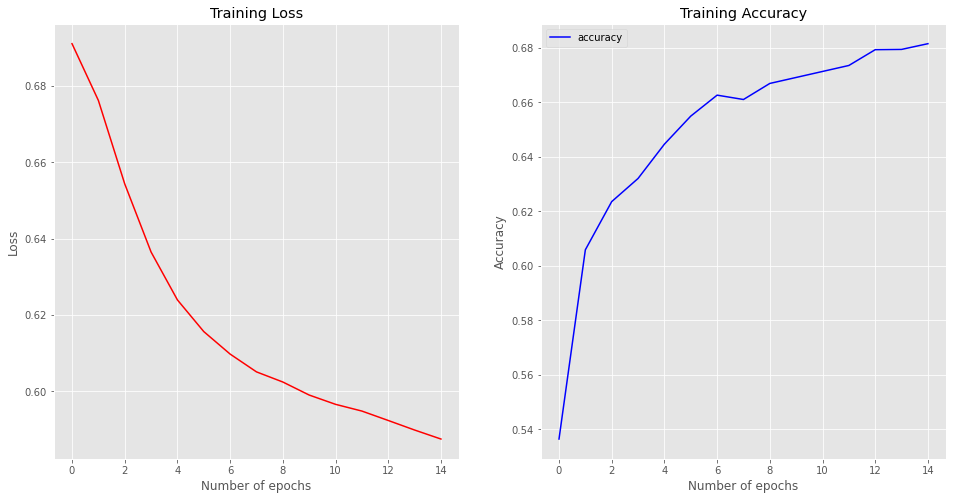

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()